In [262]:
import pandas as pd
import numpy as np

Step 1 Read data

In [263]:
df = pd.read_csv(r'./insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Checking null

In [264]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [265]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [266]:
df.corr()

C:\Users\rushi\AppData\Local\Temp\ipykernel_1868\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Step 2 converting non numeric to numeric

In [267]:
from sklearn.preprocessing import LabelEncoder

df[df.select_dtypes("object").columns] = df[df.select_dtypes("object").columns].apply(
    LabelEncoder().fit_transform
)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [268]:
df.iloc[:,-1] = np.log(df.iloc[:,-1])

In [269]:
from sklearn.model_selection import train_test_split

df_tr, df_ts = train_test_split(df, test_size=0.2)

df_tr_x = df_tr.iloc[:, 0:-1]
df_tr_y = df_tr.iloc[:, -1]
df_ts_x = df_ts.iloc[:, 0:-1]
df_ts_y = df_ts.iloc[:, -1]

df_tr_x.shape, df_tr_y.shape, df_ts_x.shape, df_ts_y.shape

((1070, 6), (1070,), (268, 6), (268,))

In [270]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

linreg = LinearRegression()
linreg.fit(df_tr_x, df_tr_y)
rsq = linreg.score(df_tr_x, df_tr_y)
print(f"Rsquare: {rsq}")
print(
    f"Adjested Rsquare{1-(1-rsq)*(df_tr_x.shape[0] - 1)/(df_tr_x.shape[0]-df_tr_x.shape[1]-1)}"
)
pred_tr = linreg.predict(df_tr_x)
pred_ts = linreg.predict(df_ts_x)
err_tr = df_tr_y - pred_tr
err_ts = df_ts_y - pred_ts

Rsquare: 0.7573555601029205
Adjested Rsquare0.7559859771872267


In [271]:
# Assumptions

err_tr.skew()

1.6396301497203123

In [272]:
err_tr.kurtosis()

3.9701338665687422

In [273]:
err_tr.mean()

1.0973568886388463e-15

In [274]:
err_tr.median()

-0.05798982177754919

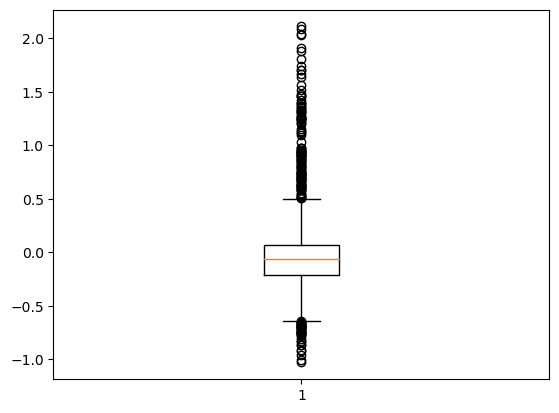

In [275]:
plt.boxplot(x=err_tr);

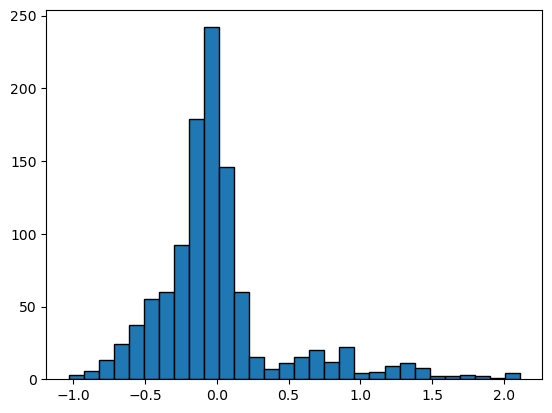

In [276]:
plt.hist(x=err_tr, bins=30, edgecolor="k");

In [277]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

mse = mean_squared_error(df_ts_y, pred_ts)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(df_ts_y, pred_ts) * 100
accuracy = 100 - mape

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"accuracy: {accuracy}")

MSE: 0.1675021306880917
RMSE: 0.4092702416351471
MAPE: 2.8871430316629905
accuracy: 97.11285696833701


In [279]:
# import pickle

# pickle.dump(linreg, open(r"./build.pkl", "wb"))